In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
#import mne

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 100)  # or 1000
pd.set_option('display.max_rows', 100)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

In [3]:
cond='na'

In [4]:
# path for saving results
path='C:\\Users\\jlai\\OneDrive\\SIN attention\\FFRs_FFT\\'

In [5]:
datapaths=[path]
files=[]
while datapaths:
    # paths.pop() gets top of directory stack to process
    # os.scandir is easier and more efficient than os.listdir,
    # though it must be closed (but with statement does this for us)
    with os.scandir(datapaths.pop()) as entries:
        for entry in entries:  # loop through the folder
            #print(entry.name)  # print text to keep track the process
            if entry.name.endswith('Sub3_'+cond+'_sffr_data.pkl'):
                #i = i+1
                #files[i]=entry.path
                files.append(entry.path)
            elif entry.is_dir():  #if it is a subfolder
                #print(entry.path, 'is dir')
                # Add to paths stack to get to it eventually
                datapaths.append(entry.path)

In [6]:
files

['C:\\Users\\jlai\\OneDrive\\SIN attention\\FFRs_FFT\\Sub3_na_sffr_data.pkl']

In [7]:
import pickle
import statistics as st
from collections import defaultdict

***Analyze Sub3


C:\Users\jlai\AppData\Local\Temp/ipykernel_13996/3751510345.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poz_rms_df['norm aRMS'][:boundary]=poz_rms_df['aRMS'][:boundary]/st.median(poz_rms_df['aRMS'][:boundary])
C:\Users\jlai\AppData\Local\Temp/ipykernel_13996/3751510345.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poz_rms_df['norm bRMS'][:boundary]=poz_rms_df['bRMS'][:boundary]/st.median(poz_rms_df['bRMS'][:boundary])
C:\Users\jlai\AppData\Local\Temp/ipykernel_13996/3751510345.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

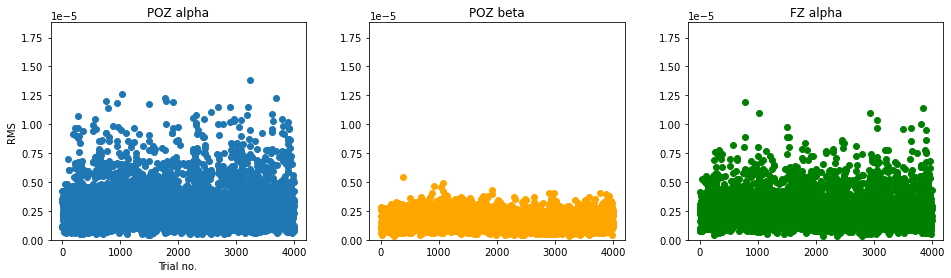

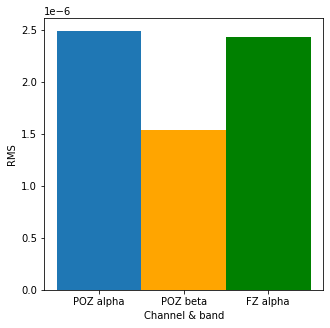

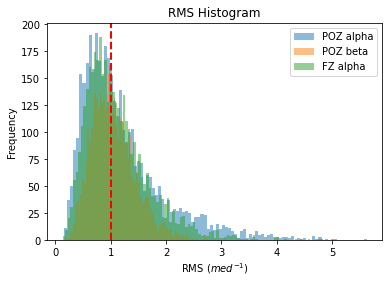

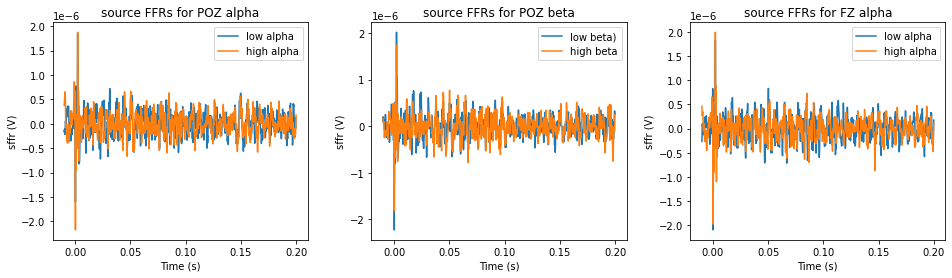

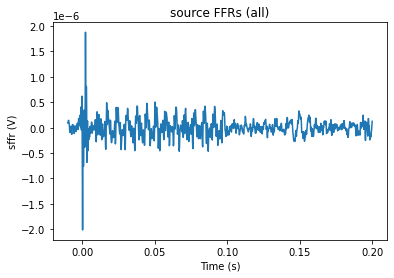

***Analysis done for Sub3


In [8]:
for n in range(len(files)):
    # read pkl file
    f =open(files[n],'rb')
    fload=pickle.load(f)
    resp_events=fload
    subject = files[n].split('\\')[-1].split('_')[0]
    print('***Analyze '+subject)
    
    # Analyze RMS of alpha and beta (POZ channel) for each triggered event ############################
    poz_rms_df=pd.DataFrame(columns=['aRMS','bRMS'])
    for trig_no in range(len(resp_events['sffr'])):
        # alpha
        alpha_rms = np.sqrt(np.mean(resp_events['POZ_a'][trig_no]**2))
        poz_rms_df.loc[trig_no,'aRMS']=alpha_rms
        # beta
        beta_rms= np.sqrt(np.mean(resp_events['POZ_b'][trig_no]**2))
        poz_rms_df.loc[trig_no,'bRMS']=beta_rms
        
    # Analyze RMS of alpha (FZ channel) for each triggered event ############################
    fz_rms_df=pd.DataFrame(columns=['aRMS'])
    for trig_no in range(len(resp_events['sffr'])):
        # alpha
        alpha_rms = np.sqrt(np.mean(resp_events['FZ_a'][trig_no]**2))
        fz_rms_df.loc[trig_no,'aRMS']=alpha_rms
    
    # plot alpha and beta RMS over trial no.
    fig, axs = plt.subplots(1,3,figsize=(16, 4), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .3, wspace=0.25)
    
    axs[0].scatter(np.arange(0,len(resp_events['sffr'])),poz_rms_df['aRMS'])
    axs[0].set_ylabel('RMS')
    axs[0].set_xlabel('Trial no.')
    axs[0].set_title('POZ alpha')
    axs[1].scatter(np.arange(0,len(resp_events['sffr'])),poz_rms_df['bRMS'],c='orange')
    axs[1].set_title('POZ beta')
    axs[2].scatter(np.arange(0,len(resp_events['sffr'])),fz_rms_df['aRMS'],c='green')
    axs[2].set_title('FZ alpha')
    custom_ylim = (0, (.000005+poz_rms_df['aRMS'].max()))
    plt.setp(axs,ylim=custom_ylim) # Setting the values for all axes
    
    ## Fixing for subjects with extra large responses #########################################
    # POZ alpha
    rms_max=poz_rms_df['aRMS'].max()
    if rms_max>0.0001:
        poz_rms_df=poz_rms_df[poz_rms_df['aRMS']<= 0.0001]
        fz_rms_df=fz_rms_df.iloc[poz_rms_df.index,:]
        
        fig, axs = plt.subplots(1,3, sharey=True,figsize=(16, 4), facecolor='w', edgecolor='k')
        fig.subplots_adjust(hspace = .3, wspace=0.25)
        axs[0].scatter(poz_rms_df.index,poz_rms_df['aRMS'])
        axs[0].set_ylabel('RMS')
        axs[0].set_xlabel('Trial no.')
        axs[0].set_title('POZ alpha')
        axs[1].scatter(poz_rms_df.index,poz_rms_df['bRMS'],c='orange')
        axs[1].set_title('POZ beta')
        axs[2].scatter(fz_rms_df.index,fz_rms_df['aRMS'],c='green')
        axs[2].set_title('FZ alpha')
        custom_ylim = (0, (.000005+poz_rms_df['aRMS'].max()))
        plt.setp(axs,ylim=custom_ylim) # Setting the values for all axes
        
        #plt.show()
        #print(poz_rms_df['aRMS'].max())
    poz_arms_med=poz_rms_df['aRMS'].median()
    #poz_arms_sem=poz_rms_df['aRMS'].sem()
    poz_brms_med=poz_rms_df['bRMS'].median()
    #poz_brms_sem=poz_rms_df['bRMS'].sem()
    fz_arms_med=fz_rms_df['aRMS'].median()
    #fz_arms_sem=fz_rms_df['aRMS'].sem()
    width=1.0
    fig = plt.subplots(figsize =(5, 5))
    p1 = plt.bar(1, poz_arms_med, width)
    p2 = plt.bar(2, poz_brms_med, width,color='orange')
    p3 = plt.bar(3, fz_arms_med, width,color='green')
    plt.ylabel('RMS')
    plt.xticks([1,2,3],['POZ alpha','POZ beta','FZ alpha'])
    plt.xlabel('Channel & band')
    
    boundary=len(poz_rms_df)//2
    # POZ alpha
    poz_rms_df['norm aRMS']=0    
    poz_rms_df['norm aRMS'][:boundary]=poz_rms_df['aRMS'][:boundary]/st.median(poz_rms_df['aRMS'][:boundary])
    poz_rms_df['norm aRMS'][boundary:]=poz_rms_df['aRMS'][boundary:]/st.median(poz_rms_df['aRMS'][boundary:])
     # POZ beta
    poz_rms_df['norm bRMS']=0    
    poz_rms_df['norm bRMS'][:boundary]=poz_rms_df['bRMS'][:boundary]/st.median(poz_rms_df['bRMS'][:boundary])
    poz_rms_df['norm bRMS'][boundary:]=poz_rms_df['bRMS'][boundary:]/st.median(poz_rms_df['bRMS'][boundary:])
     # FZ alpha
    fz_rms_df['norm aRMS']=0    
    fz_rms_df['norm aRMS'][:boundary]=fz_rms_df['aRMS'][:boundary]/st.median(fz_rms_df['aRMS'][:boundary])
    fz_rms_df['norm aRMS'][boundary:]=fz_rms_df['aRMS'][boundary:]/st.median(fz_rms_df['aRMS'][boundary:])
    
    cut_off=1
    plt.figure()
    plt.hist(poz_rms_df['norm aRMS'],bins=100,label='POZ alpha',alpha=0.5)
    plt.hist(poz_rms_df['norm bRMS'],bins=100,label='POZ beta',alpha=0.5)
    plt.hist(fz_rms_df['norm aRMS'],bins=100,label='FZ alpha',alpha=0.5)
    plt.gca().set(title='RMS Histogram', ylabel='Frequency',xlabel='RMS ($med^{-1}$)')
    plt.axvline(x=cut_off, color='r', linestyle='dashed', linewidth=2)
    plt.legend()
    plt.show()
    # Extract percentile: 25th for low and 75 for high alpha
    lows_poza=np.percentile(poz_rms_df['norm aRMS'],25) # 25th percentile
    highs_poza=np.percentile(poz_rms_df['norm aRMS'],75) # 75th percentile
    
    lows_pozb=np.percentile(poz_rms_df['norm bRMS'],25) # 25th percentile
    highs_pozb=np.percentile(poz_rms_df['norm bRMS'],75) # 75th percentile
    
    lows_fza=np.percentile(fz_rms_df['norm aRMS'],25) # 25th percentile
    highs_fza=np.percentile(fz_rms_df['norm aRMS'],75) # 75th percentile
    # sort alpha_RMS into high(H) and low(L) attention
    poz_rms_df['alpha']=0
    poz_rms_df['beta']=0
    fz_rms_df['alpha']=0
    for trig_no in poz_rms_df.index:
        if poz_rms_df.loc[trig_no,'norm aRMS']<= lows_poza: # engage in activities/ high attention
            poz_rms_df.loc[trig_no,'alpha']='L'
        elif poz_rms_df.loc[trig_no,'norm aRMS']>= highs_poza: # wakeful but relax/ low attention
            poz_rms_df.loc[trig_no,'alpha']='H'
        if poz_rms_df.loc[trig_no,'norm bRMS']<= lows_pozb: 
            poz_rms_df.loc[trig_no,'beta']='L'
        elif poz_rms_df.loc[trig_no,'norm bRMS']>= highs_pozb: 
            poz_rms_df.loc[trig_no,'beta']='H'
        if fz_rms_df.loc[trig_no,'norm aRMS']<= lows_fza:
            fz_rms_df.loc[trig_no,'alpha']='L'
        elif fz_rms_df.loc[trig_no,'norm aRMS']>= highs_fza:
            fz_rms_df.loc[trig_no,'alpha']='H'
            
    high_poza=poz_rms_df[poz_rms_df['alpha']=='H']
    low_poza=poz_rms_df[poz_rms_df['alpha']=='L']
    high_pozb=poz_rms_df[poz_rms_df['beta']=='H']
    low_pozb=poz_rms_df[poz_rms_df['beta']=='L']
    high_fza=fz_rms_df[fz_rms_df['alpha']=='H']
    low_fza=fz_rms_df[fz_rms_df['alpha']=='L']
    
    # source FFRs ###########################################
    poz_loalpha_resp=[]
    poz_hialpha_resp=[]
    for ll in low_poza.index:
        if max(abs(resp_events['sffr'][ll]))<0.0001:
            poz_loalpha_resp.append(resp_events['sffr'][ll])

    for hh in high_poza.index:
        if max(abs(resp_events['sffr'][hh]))<0.0001:
            poz_hialpha_resp.append(resp_events['sffr'][hh])
    
    poz_lobeta_resp=[]
    poz_hibeta_resp=[]
    for ll in low_pozb.index:
        if max(abs(resp_events['sffr'][ll]))<0.0001:
            poz_lobeta_resp.append(resp_events['sffr'][ll])

    for hh in high_pozb.index:
        if max(abs(resp_events['sffr'][hh]))<0.0001:
            poz_hibeta_resp.append(resp_events['sffr'][hh])
            
    fz_loalpha_resp=[]
    fz_hialpha_resp=[]
    for ll in low_fza.index:
        if max(abs(resp_events['sffr'][ll]))<0.0001:
            fz_loalpha_resp.append(resp_events['sffr'][ll])

    for hh in high_fza.index:
        if max(abs(resp_events['sffr'][hh]))<0.0001:
            fz_hialpha_resp.append(resp_events['sffr'][hh])
    
    # POZ alpha #####################################
    # get the average FFRs of low alpha
    loalpha_y = poz_loalpha_resp[0][:1050]
    for ll in range(len(poz_loalpha_resp)-1):
        loalpha_y_sum = loalpha_y + poz_loalpha_resp[ll+1][:1050]
        loalpha_y=loalpha_y_sum

    poz_loalpha_y_ave=loalpha_y_sum/len(poz_loalpha_resp) # average response
    
    # get the average FFRs of high alpha
    hialpha_y = poz_hialpha_resp[0][:1050]
    for hh in range(len(poz_hialpha_resp)-1):
        hialpha_y_sum = hialpha_y + poz_hialpha_resp[hh+1][:1050]
        hialpha_y=hialpha_y_sum
        
    poz_hialpha_y_ave=hialpha_y_sum/len(poz_hialpha_resp) # average response
    # POZ beta #################################   
    # get the average FFRs of low beta
    lobeta_y = poz_lobeta_resp[0][:1050]
    for ll in range(len(poz_lobeta_resp)-1):
        lobeta_y_sum = lobeta_y + poz_lobeta_resp[ll+1][:1050]
        lobeta_y=lobeta_y_sum

    poz_lobeta_y_ave=lobeta_y_sum/len(poz_lobeta_resp) # average response
    
    # get the average FFRs of high beta
    hibeta_y = poz_hibeta_resp[0][:1050]
    for hh in range(len(poz_hibeta_resp)-1):
        hibeta_y_sum = hibeta_y + poz_hibeta_resp[hh+1][:1050]
        hibeta_y=hibeta_y_sum
    
    poz_hibeta_y_ave=hibeta_y_sum/len(poz_hibeta_resp) # average response
    
    # FZ alpha ######################################
    # get the average FFRs of low alpha
    loalpha_y = fz_loalpha_resp[0][:1050]
    for ll in range(len(fz_loalpha_resp)-1):
        loalpha_y_sum = loalpha_y + fz_loalpha_resp[ll+1][:1050]
        loalpha_y=loalpha_y_sum

    fz_loalpha_y_ave=loalpha_y_sum/len(fz_loalpha_resp) # average response
    
    # get the average FFRs of high alpha
    hialpha_y = fz_hialpha_resp[0][:1050]
    for hh in range(len(fz_hialpha_resp)-1):
        hialpha_y_sum = hialpha_y + fz_hialpha_resp[hh+1][:1050]
        hialpha_y=hialpha_y_sum
        
    fz_hialpha_y_ave=hialpha_y_sum/len(fz_hialpha_resp) # average response
    
    # plot average FFR for low vs high alpha
    x=np.arange(-0.01,0.2,1/5000)
    fig, axs = plt.subplots(1,3, figsize=(16, 4), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .3, wspace=0.25)
    
    axs[0].plot(x,poz_loalpha_y_ave,label='low alpha')
    axs[0].plot(x,poz_hialpha_y_ave,label='high alpha')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('sffr (V)')
    axs[0].legend()
    axs[0].set_title('source FFRs for POZ alpha')
    
    axs[1].plot(x,poz_lobeta_y_ave,label='low beta)')
    axs[1].plot(x,poz_hibeta_y_ave,label='high beta')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('sffr (V)')
    axs[1].legend()
    axs[1].set_title('source FFRs for POZ beta')
    
    axs[2].plot(x,fz_loalpha_y_ave,label='low alpha')
    axs[2].plot(x,fz_hialpha_y_ave,label='high alpha')
    axs[2].set_xlabel('Time (s)')
    axs[2].set_ylabel('sffr (V)')
    axs[2].legend()
    axs[2].set_title('source FFRs for FZ alpha')
    #plt.show()
    
    # Average all FFRs
    y = resp_events['sffr'][0][:1050]
    for tt in poz_rms_df.index:
        if tt>0 & tt<len(poz_rms_df):
            if max(abs(resp_events['sffr'][tt]))<0.0001:
                y_sum = y + resp_events['sffr'][tt][:1050]
                y=y_sum
    y_ave=y_sum/(len(poz_rms_df)) # average response

    plt.figure()
    plt.plot(x,y_ave)
    plt.xlabel('Time (s)')
    plt.ylabel('sffr (V)')
    plt.title('source FFRs (all)')
    plt.show()
    
    # Save analyzed results #################################################
    res=defaultdict(dict)
    res['poz_lowalpha']['FFRs']=poz_loalpha_y_ave
    res['poz_hialpha']['FFRs']=poz_hialpha_y_ave
    res['poz_lowbeta']['FFRs']=poz_lobeta_y_ave
    res['poz_hibeta']['FFRs']=poz_hibeta_y_ave
    res['fz_lowalpha']['FFRs']=fz_loalpha_y_ave
    res['fz_hialpha']['FFRs']=fz_hialpha_y_ave

    res['Time(s)']['FFRs']=x
    
    fname=subject+'_'+cond
    #f = open(path+fname+'_res_med.pkl','wb')
    #pickle.dump(res,f)
    #f.close()
    
    #poz_rms_df.to_pickle(path+subject+'_poz_rms_'+cond+'.pkl')
    #fz_rms_df.to_pickle(path+subject+'_fz_rms_'+cond+'.pkl')
    
    print('***Analysis done for '+subject)

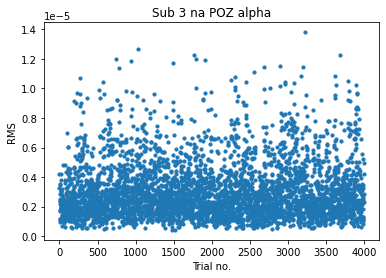

In [10]:
#fig, axs = plt.subplots(1,2,figsize=(12, 5), facecolor='w', edgecolor='k')
#fig.subplots_adjust(wspace=0.25)

plt.scatter(np.arange(0,len(resp_events['sffr'])),poz_rms_df['aRMS'],s=10)
plt.ylabel('RMS')
plt.xlabel('Trial no.')
plt.title('Sub 3 na POZ alpha')

figpath='C:\\Users\\jlai\\OneDrive\\SIN attention\\Figs_tables\\'
plt.savefig(figpath+'Sub3_na_RMS.pdf')

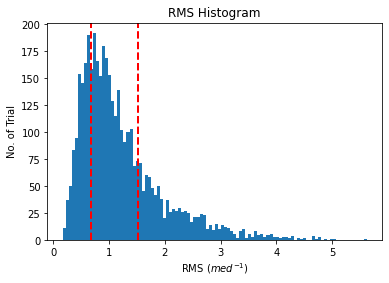

In [11]:
line_25th=lows_poza
line_75th=highs_poza
plt.hist(poz_rms_df['norm aRMS'],bins=100)
plt.title('RMS Histogram')
plt.xlabel('RMS ($med^{-1}$)')
plt.ylabel('No. of Trial')
plt.axvline(x=line_25th, color='r', linestyle='dashed', linewidth=2)
plt.axvline(x=line_75th, color='r', linestyle='dashed', linewidth=2)
figpath='C:\\Users\\Jesyin\\OneDrive\\SIN attention\\Figs_tables\\'
plt.savefig(figpath+'Sub3_na_RMShist.pdf')